<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Collabs/blob/main/DescensodeGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Descenso de Gradiente
En *Machine Learning*, un objetivo fundamental es encontrar los mejores 'parámetros' o 'coeficientes' para nuestro modelo. Por ejemplo, en la regresión lineal, buscamos la pendiente y el intercepto óptimos. A veces, podemos usar una fórmula matemática directa para encontrar estos valores (como en la regresión lineal simple que vimos antes).

Sin embargo, para muchos modelos más complejos, como la Regresión Logística, las Redes Neuronales o modelos con muchas variables, no existe una fórmula directa. Aquí es donde entra en juego la 'optimización iterativa', y la técnica más fundamental para ello es el Descenso de Gradiente.
Imagina que estás en la cima de una montaña (nuestra función de costo, que queremos minimizar) y quieres llegar al punto más bajo (el mínimo). La forma más intuitiva de hacerlo es mirar a tu alrededor, identificar la dirección de mayor descenso y dar un pequeño paso en esa dirección. Repites este proceso una y otra vez hasta que no puedas descender más.

Esto es, en esencia, lo que hace el **Descenso de Gradiente**:

- Comienza con una estimación inicial: Elige valores aleatorios para los parámetros del modelo.
- Calcula la 'pendiente': En cada paso, calcula la pendiente de la función de costo con respecto a cada parámetro (esto nos dice la dirección más empinada).
Da un 'paso': Mueve los parámetros en la dirección opuesta a la pendiente (hacia el descenso). La magnitud del paso se controla con el 'tamaño del paso' o 'tasa de aprendizaje'.
- Repite: Continúa este proceso hasta que los parámetros converjan (ya no cambien mucho) o se alcance un número máximo de iteraciones.

El objetivo es minimizar una 'función de costo' (o 'función de pérdida'), como la Suma de Residuos Cuadrados (SSR) que vimos en la regresión lineal. Queremos encontrar los parámetros del modelo que hacen que esta función de costo sea lo más pequeña posible.

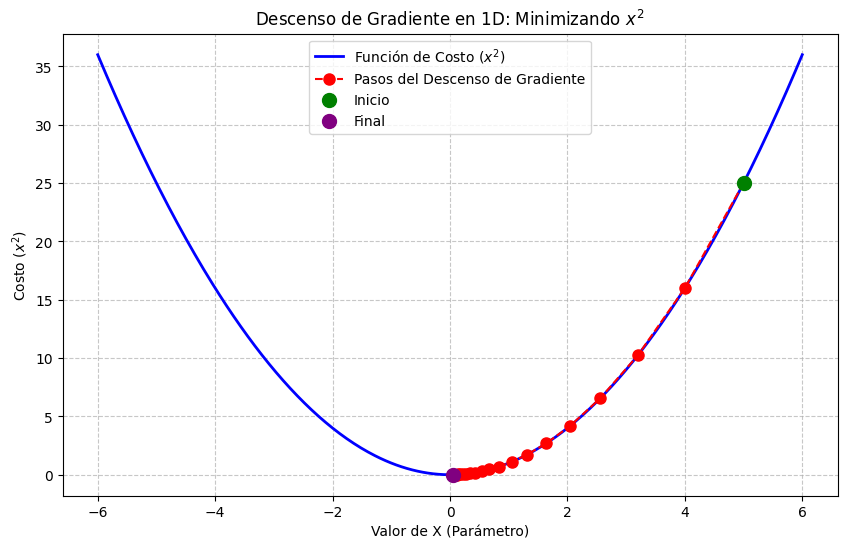

Valor inicial de X: 5.0
Valor final de X (después de 20 iteraciones): 0.0576
Costo final: 0.0033

Observa cómo el algoritmo de Descenso de Gradiente se mueve iterativamente desde el punto inicial hacia el mínimo de la función de costo.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función de costo (una parábola simple)
def cost_function(x):
    return x**2

# Definir la derivada de la función de costo
def derivative(x):
    return 2 * x

# Parámetros del Descenso de Gradiente
initial_x = 5.0 # Punto de partida inicial
learning_rate = 0.1 # Tamaño del paso (tasa de aprendizaje)
n_iterations = 20 # Número de pasos

# Almacenar el historial de x y costo para graficar
x_history = [initial_x]
cost_history = [cost_function(initial_x)]

# Realizar el Descenso de Gradiente
x_current = initial_x
for i in range(n_iterations):
    gradient = derivative(x_current) # Calcular la pendiente
    x_current = x_current - learning_rate * gradient # Dar un paso en la dirección opuesta a la pendiente
    x_history.append(x_current)
    cost_history.append(cost_function(x_current))

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar la función de costo
x_vals = np.linspace(-6, 6, 400)
plt.plot(x_vals, cost_function(x_vals), label='Función de Costo ($x^2$)', color='blue', linewidth=2)

# Trazar el camino del descenso de gradiente
plt.plot(x_history, cost_history, 'o--', color='red', markersize=8, label='Pasos del Descenso de Gradiente')

# Marcar el punto inicial y final
plt.plot(x_history[0], cost_history[0], 'o', color='green', markersize=10, label='Inicio')
plt.plot(x_history[-1], cost_history[-1], 'o', color='purple', markersize=10, label='Final')


plt.xlabel("Valor de X (Parámetro)")
plt.ylabel("Costo ($x^2$)")
plt.title("Descenso de Gradiente en 1D: Minimizando $x^2$")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print(f"Valor inicial de X: {initial_x}")
print(f"Valor final de X (después de {n_iterations} iteraciones): {x_history[-1]:.4f}")
print(f"Costo final: {cost_history[-1]:.4f}")
print("\nObserva cómo el algoritmo de Descenso de Gradiente se mueve iterativamente desde el punto inicial hacia el mínimo de la función de costo.")

Para entender cómo funciona el Descenso de Gradiente, imaginemos una función de costo muy simple: y=x^2
 . Queremos encontrar el valor de x que minimiza y (que es x=0).

Este script simula el Descenso de Gradiente para esta función. Comenzamos en un punto arbitrario (initial_x = 5.0). En cada paso:

Calculamos la derivada (la pendiente) de la función en nuestra posición actual.
Movemos nuestro valor de x en la dirección opuesta a la pendiente, con un tamaño de paso controlado por la learning_rate (tasa de aprendizaje).
El gráfico muestra cómo, a medida que el algoritmo itera (los puntos rojos), se acerca gradualmente al mínimo de la función de costo (donde x=0). Los primeros pasos son más grandes porque la pendiente es más pronunciada, y a medida que nos acercamos al mínimo, los pasos se vuelven más pequeños porque la pendiente disminuye.

La 'tasa de aprendizaje' (learning rate) o 'tamaño del paso' es un hiperparámetro crucial en el Descenso de Gradiente. Determina qué tan grandes son los pasos que tomamos hacia el mínimo.

- Tasa de aprendizaje muy pequeña: El algoritmo tardará mucho en converger (muchos pasos) y podría quedarse atascado en mínimos locales en paisajes de costos complejos.
- Tasa de aprendizaje muy grande: El algoritmo podría 'rebotar' sobre el mínimo, no converger en absoluto, o incluso divergir (alejarse cada vez más del mínimo)

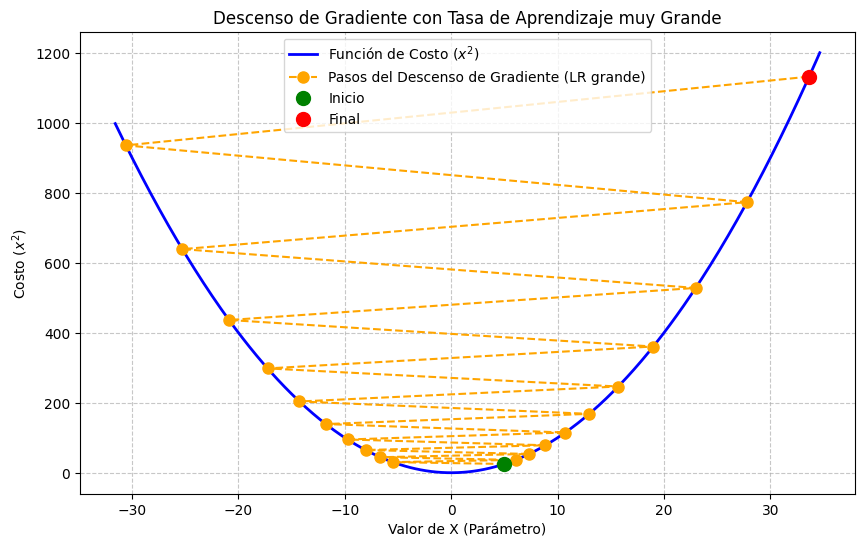

Valor inicial de X: 5.0
Valor final de X (después de 20 iteraciones): 33.6375
Costo final: 1131.4814

Observa cómo con una tasa de aprendizaje muy grande, el algoritmo 'salta' sobre el mínimo, oscilando o incluso divergiendo.


In [ ]:
##  Efecto de una Tasa de Aprendizaje muy grande
import matplotlib.pyplot as plt
import numpy as np

# Definir la función de costo y su derivada
def cost_function(x):
    return x**2

def derivative(x):
    return 2 * x

# Parámetros del Descenso de Gradiente con una tasa de aprendizaje grande
initial_x_large = 5.0
learning_rate_large = 1.05 # Tasa de aprendizaje demasiado grande
n_iterations_large = 20

# Almacenar el historial
x_history_large = [initial_x_large]
cost_history_large = [cost_function(initial_x_large)]

# Realizar el Descenso de Gradiente
x_current_large = initial_x_large
for i in range(n_iterations_large):
    gradient_large = derivative(x_current_large)
    x_current_large = x_current_large - learning_rate_large * gradient_large
    x_history_large.append(x_current_large)
    cost_history_large.append(cost_function(x_current_large))

# Crear el gráfico
plt.figure(figsize=(10, 6))

x_vals = np.linspace(min(-6, min(x_history_large)-1), max(6, max(x_history_large)+1), 400)
plt.plot(x_vals, cost_function(x_vals), label='Función de Costo ($x^2$)', color='blue', linewidth=2)

plt.plot(x_history_large, cost_history_large, 'o--', color='orange', markersize=8, label='Pasos del Descenso de Gradiente (LR grande)')

plt.plot(x_history_large[0], cost_history_large[0], 'o', color='green', markersize=10, label='Inicio')
plt.plot(x_history_large[-1], cost_history_large[-1], 'o', color='red', markersize=10, label='Final')


plt.xlabel("Valor de X (Parámetro)")
plt.ylabel("Costo ($x^2$)")
plt.title("Descenso de Gradiente con Tasa de Aprendizaje muy Grande")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print(f"Valor inicial de X: {initial_x_large}")
print(f"Valor final de X (después de {n_iterations_large} iteraciones): {x_history_large[-1]:.4f}")
print(f"Costo final: {cost_history_large[-1]:.4f}")
print("\nObserva cómo con una tasa de aprendizaje muy grande, el algoritmo 'salta' sobre el mínimo, oscilando o incluso divergiendo.")

Este script demuestra lo que sucede si la learning_rate es demasiado grande. En lugar de acercarse suavemente al mínimo, el algoritmo 'salta' de un lado a otro del mínimo, e incluso puede empezar a alejarse cada vez más. Esto se llama divergencia.

Elegir una tasa de aprendizaje adecuada es crucial. Es un equilibrio: si es demasiado pequeña, el entrenamiento es lento; si es demasiado grande, el modelo nunca converge o diverge.*texto en cursiva*

Ahora, apliquemos el Descenso de Gradiente para encontrar la mejor línea de regresión para nuestros datos de peso y estatura. Recuerden que la función de costo es la Suma de Residuos Cuadrados (SSR). Queremos encontrar la pendiente (m) y la ordenada al origen (b) que minimicen la SSR.

La función de costo para regresión lineal es:

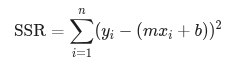

Las derivadas parciales con respecto a m y b (los gradientes) son:


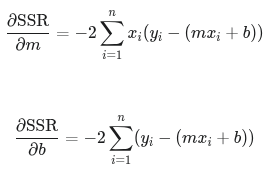

Utilizaremos estas derivadas para actualizar m y b iterativamente."



Iteración 0: Costo = 0.0518, m = 0.0240, b = 0.0003
Iteración 100: Costo = 0.0506, m = 0.0235, b = 0.0012
Iteración 200: Costo = 0.0505, m = 0.0235, b = 0.0021
Iteración 300: Costo = 0.0504, m = 0.0235, b = 0.0030
Iteración 400: Costo = 0.0503, m = 0.0235, b = 0.0039
Iteración 500: Costo = 0.0503, m = 0.0234, b = 0.0048
Iteración 600: Costo = 0.0502, m = 0.0234, b = 0.0056
Iteración 700: Costo = 0.0501, m = 0.0234, b = 0.0065
Iteración 800: Costo = 0.0500, m = 0.0234, b = 0.0074
Iteración 900: Costo = 0.0499, m = 0.0234, b = 0.0083

Valores finales: Pendiente (m) = 0.0234, Ordenada (b) = 0.0091
Costo final (MSE): 0.0499


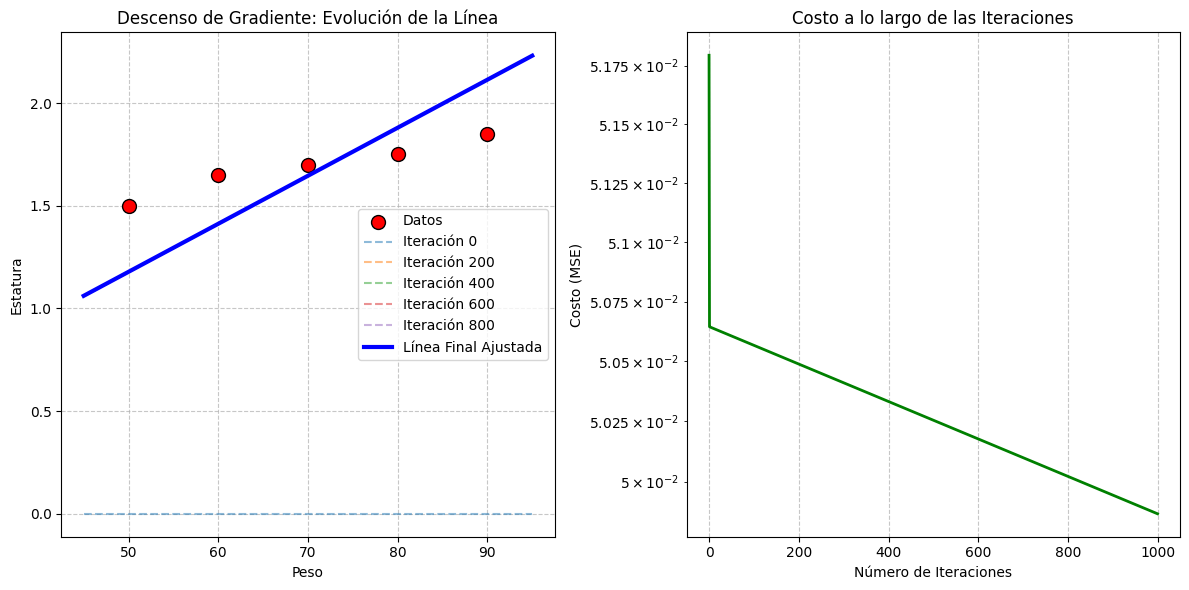

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
peso = np.array([50, 60, 70, 80, 90])
estatura = np.array([1.50, 1.65, 1.70, 1.75, 1.85])

# Hiperparámetros del Descenso de Gradiente
learning_rate = 0.0001 # Cuidado con este valor, es sensible al rango de los datos
n_iterations = 1000

# Inicializar pendiente (m) y ordenada al origen (b) aleatoriamente
m = 0.0
b = 0.0

# Almacenar el historial para visualización
m_history = [m]
b_history = [b]
cost_history = []

# Función de costo (SSR)
def compute_cost(X, y, m, b):
    predictions = m * X + b
    return np.sum((y - predictions)**2) / len(X) # MSE para normalizar

# Bucle de Descenso de Gradiente
for i in range(n_iterations):
    predictions = m * peso + b
    errors = estatura - predictions

    # Calcular gradientes (derivadas parciales)
    dm = -2 * np.sum(peso * errors) / len(peso)
    db = -2 * np.sum(errors) / len(peso)

    # Actualizar m y b
    m = m - learning_rate * dm
    b = b - learning_rate * db

    m_history.append(m)
    b_history.append(b)
    cost_history.append(compute_cost(peso, estatura, m, b))

    if i % 100 == 0:
        print(f"Iteración {i}: Costo = {cost_history[-1]:.4f}, m = {m:.4f}, b = {b:.4f}")

print(f"\nValores finales: Pendiente (m) = {m:.4f}, Ordenada (b) = {b:.4f}")
print(f"Costo final (MSE): {cost_history[-1]:.4f}")

# --- Visualización del proceso de ajuste de la línea ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(peso, estatura, color='red', s=100, edgecolors='black', label='Datos', zorder=2)
x_plot = np.linspace(peso.min() - 5, peso.max() + 5, 100)

# Mostrar la evolución de la línea cada cierto número de iteraciones
for i in range(0, n_iterations, int(n_iterations/5)): # Mostrar 5 líneas intermedias
    current_m = m_history[i]
    current_b = b_history[i]
    plt.plot(x_plot, current_m * x_plot + current_b, alpha=0.5, linestyle='--',
             label=f'Iteración {i}')

plt.plot(x_plot, m * x_plot + b, color='blue', linewidth=3, label='Línea Final Ajustada')
plt.xlabel("Peso")
plt.ylabel("Estatura")
plt.title("Descenso de Gradiente: Evolución de la Línea")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# --- Visualización del Costo a lo largo de las iteraciones ---
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history, color='green', linewidth=2)
plt.xlabel("Número de Iteraciones")
plt.ylabel("Costo (MSE)")
plt.title("Costo a lo largo de las Iteraciones")
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log') # Escala logarítmica para ver mejor el descenso inicial

plt.tight_layout()
plt.show()

Aquí, implementamos el Descenso de Gradiente 'desde cero' para la Regresión Lineal. Esto significa que nosotros mismos calculamos las derivadas de la función de costo (SSR) con respecto a la pendiente (m) y a la ordenada al origen (b).

En cada 'iteración':

Calculamos las predicciones del modelo actual.
Calculamos el 'error' (la diferencia entre las predicciones y los valores reales).
Calculamos los 'gradientes' (qué tan sensible es la función de costo a pequeños cambios en m y b).
Actualizamos m y b moviéndolos en la dirección opuesta a sus respectivos gradientes, multiplicado por la learning_rate.
El primer gráfico muestra cómo la línea de regresión evoluciona desde una posición inicial hasta la línea de mejor ajuste a lo largo de las iteraciones. El segundo gráfico, el 'Gráfico de Costo', es crucial. Nos muestra cómo el valor de la función de costo disminuye con cada iteración, confirmando que el algoritmo está convergiendo hacia el mínimo. ¡Así es como los modelos aprenden!

## Mínimos Locales y Estrategias para evitarlos
Un desafío importante en el Descenso de Gradiente es la posibilidad de caer en un 'mínimo local' en lugar de encontrar el 'mínimo global'.

Imagina un paisaje montañoso con varios valles. El mínimo global es el valle más profundo de todos, pero hay otros valles más pequeños (mínimos locales) donde el algoritmo podría quedarse atascado si no encuentra un camino para salir.

Para la regresión lineal simple (SSR), la función de costo es convexa, lo que significa que solo tiene un mínimo global y ninguna trampa de mínimos locales. Sin embargo, para modelos más complejos (como redes neuronales), la función de costo puede ser no convexa y tener múltiples mínimos locales.

Podemos aplicar algunas estrategias para intentar evitar mínimos locales

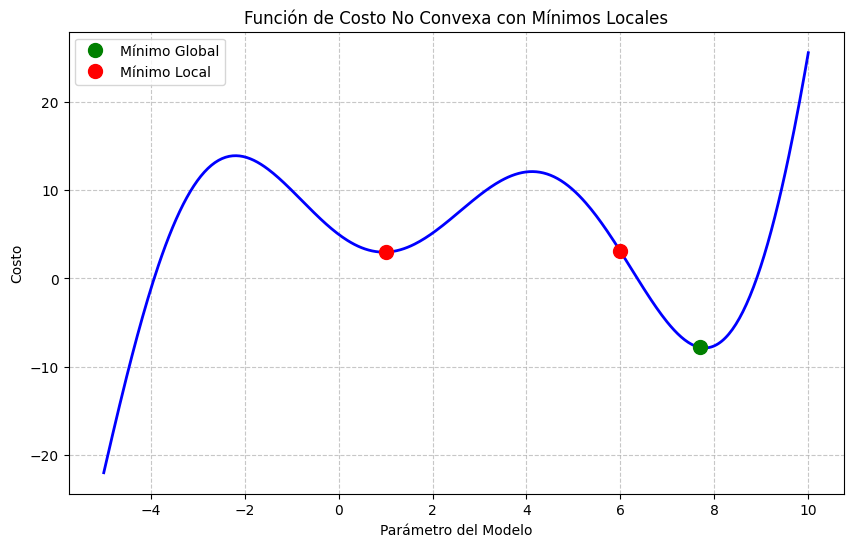

Este gráfico ilustra una función de costo 'no convexa', que tiene múltiples valles (mínimos).
El 'mínimo global' es el punto más bajo de toda la función.
Los 'mínimos locales' son otros puntos bajos, pero no el más bajo de todos.
Un algoritmo de Descenso de Gradiente podría quedarse atascado en un mínimo local si su punto de partida o tasa de aprendizaje no son adecuados.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir una función de costo con múltiples mínimos (no convexa)
def non_convex_cost(x):
    return (x**2 - 4*x - 5) * np.cos(x/2) + 10 # Una función con múltiples valles

# Crear el gráfico
plt.figure(figsize=(10, 6))

x_vals = np.linspace(-5, 10, 400)
plt.plot(x_vals, non_convex_cost(x_vals), color='blue', linewidth=2)

# Marcar mínimos locales y globales (aproximados)
min_global_x = 7.7 # Aprox.
min_local_x1 = 1 # Aprox.
min_local_x2 = 6 # Aprox.

plt.plot(min_global_x, non_convex_cost(min_global_x), 'o', color='green', markersize=10, label='Mínimo Global')
plt.plot(min_local_x1, non_convex_cost(min_local_x1), 'o', color='red', markersize=10, label='Mínimo Local')
plt.plot(min_local_x2, non_convex_cost(min_local_x2), 'o', color='red', markersize=10) # Otro mínimo local

plt.xlabel("Parámetro del Modelo")
plt.ylabel("Costo")
plt.title("Función de Costo No Convexa con Mínimos Locales")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("Este gráfico ilustra una función de costo 'no convexa', que tiene múltiples valles (mínimos).")
print("El 'mínimo global' es el punto más bajo de toda la función.")
print("Los 'mínimos locales' son otros puntos bajos, pero no el más bajo de todos.")
print("Un algoritmo de Descenso de Gradiente podría quedarse atascado en un mínimo local si su punto de partida o tasa de aprendizaje no son adecuados.")

Este gráfico ilustra el problema de los mínimos locales. A diferencia de la función cuadrática simple que tiene un solo mínimo, esta función más compleja tiene múltiples 'valles'. El valle más profundo es el mínimo global, que es lo que realmente queremos encontrar. Sin embargo, existen otros valles más pequeños, los mínimos locales.

Si nuestro Descenso de Gradiente comienza en un punto que lleva a un mínimo local, podría quedarse atascado allí, pensando que ha encontrado la mejor solución, cuando en realidad hay una solución mucho mejor (el mínimo global) en otra parte.

Para mitigar el riesgo de quedarse atascado en un mínimo local, podemos emplear varias estrategias:

Múltiples Inicializaciones Aleatorias: Comenzar el Descenso de Gradiente desde diferentes puntos iniciales elegidos al azar. Si la función de costo es compleja, probar varios puntos de partida aumenta la probabilidad de encontrar el mínimo global o al menos un mínimo local mejor.

Ajuste del Tamaño del Paso (Learning Rate): Un tamaño de paso ligeramente más grande puede ayudar al algoritmo a 'saltar' fuera de mínimos locales poco profundos, aunque hay que tener cuidado de no hacerlo tan grande que el algoritmo diverja.

Descenso de Gradiente Estocástico (Stochastic Gradient Descent - SGD): En lugar de calcular el gradiente usando todos los datos en cada paso (Descenso de Gradiente por Lotes), SGD calcula el gradiente y actualiza los parámetros usando un solo punto de dato (o un pequeño subconjunto, llamado Mini-Batch). La aleatoriedad introducida por SGD ayuda a 'sacudir' al algoritmo fuera de los mínimos locales.

### Descenso de Gradiente Estocástico (SGD) y Mini-Batch
Mientras que el Descenso de Gradiente tradicional (Batch Gradient Descent) calcula el gradiente utilizando todos los datos en cada iteración, lo que puede ser computacionalmente costoso para conjuntos de datos grandes, existen variantes más eficientes:

Descenso de Gradiente Estocástico (SGD): Actualiza los parámetros después de procesar cada ejemplo de entrenamiento individual. Introduce más ruido en la ruta de optimización, lo que puede ayudar a escapar de mínimos locales, pero el proceso de convergencia puede ser más ruidoso.
Descenso de Gradiente en Mini-Batch: Es un punto intermedio entre Batch GD y SGD. Calcula el gradiente y actualiza los parámetros utilizando un pequeño subconjunto (mini-batch) de los datos de entrenamiento en cada iteración. Es la forma más comúnmente utilizada en la práctica, ya que ofrece un buen equilibrio entre eficiencia computacional y estabilidad de convergencia.
El tamaño del Mini-Batch es un hiperparámetro que se elige cuidadosamente, a menudo en función del hardware disponible (memoria de alta velocidad).

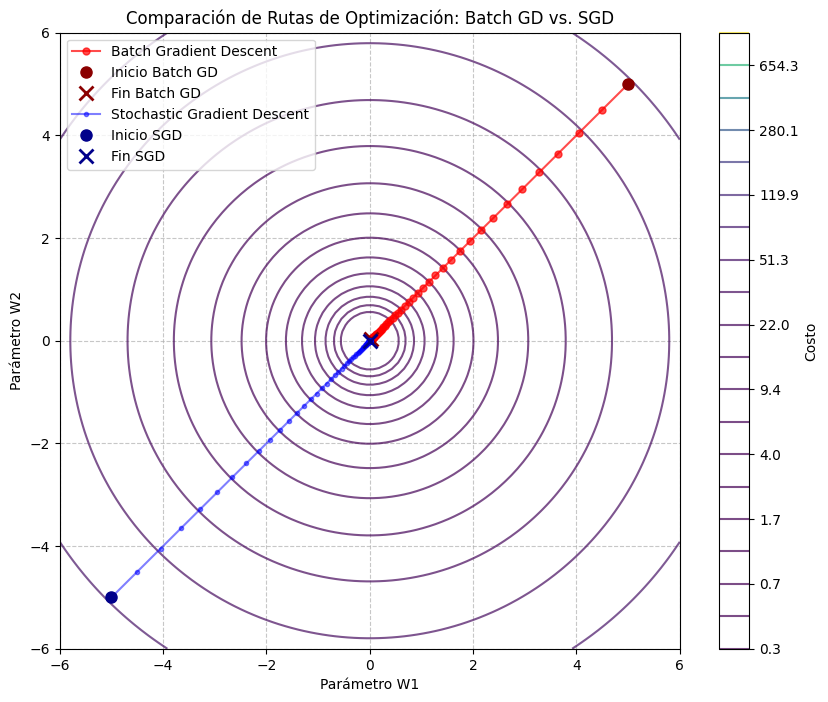

Este gráfico muestra las rutas que toman Batch Gradient Descent y Stochastic Gradient Descent (SGD) para encontrar el mínimo de la función de costo.
Batch GD toma un camino más directo y suave porque usa el gradiente promedio de todos los datos en cada paso.
SGD, por otro lado, tiene una ruta más 'ruidosa' o 'zigzagueante' porque actualiza los parámetros basándose en el gradiente de un solo punto de dato (o un mini-batch), lo que introduce más variabilidad. Esta aleatoriedad puede ayudarle a escapar de mínimos locales.


In [ ]:
# Diferencia Conceptual entre Batch GD y SGD
import matplotlib.pyplot as plt
import numpy as np

# Simulación de una función de costo simple (en 2D para visualización)
# Mínimo en (0,0)
def cost_surface(w1, w2):
    return w1**2 + w2**2

# Gradiente de la función de costo
def gradient_cost(w1, w2):
    return 2 * w1, 2 * w2

# Datos de ejemplo (simulando 20 puntos)
np.random.seed(42)
num_data_points = 20
data_points = np.random.randn(num_data_points, 2) * 5 # Datos en un espacio 2D

# --- Batch Gradient Descent ---
initial_w_batch = np.array([5.0, 5.0])
learning_rate_batch = 0.05
n_iterations_batch = 50

w_history_batch = [initial_w_batch]
current_w_batch = initial_w_batch

for i in range(n_iterations_batch):
    # Calcular gradiente usando TODOS los datos (conceptual, aquí solo se usa la función de costo)
    # En un modelo real, se sumaría el gradiente de cada punto.
    grad_w1, grad_w2 = gradient_cost(current_w_batch[0], current_w_batch[1])
    gradient_batch = np.array([grad_w1, grad_w2]) # Suma de gradientes de todos los puntos

    current_w_batch = current_w_batch - learning_rate_batch * gradient_batch
    w_history_batch.append(current_w_batch)

w_history_batch = np.array(w_history_batch)

# --- Stochastic Gradient Descent ---
initial_w_sgd = np.array([-5.0, -5.0])
learning_rate_sgd = 0.05
n_epochs_sgd = 5 # Iteraciones sobre todos los puntos de datos

w_history_sgd = [initial_w_sgd]
current_w_sgd = initial_w_sgd

for epoch in range(n_epochs_sgd):
    # Barajar los datos para cada época
    np.random.shuffle(data_points)
    for j in range(num_data_points):
        # Simular el gradiente de un solo punto de dato
        # Esto sería `grad_w1, grad_w2 = derivative_for_single_point(current_w_sgd[0], current_w_sgd[1], data_points[j])`
        # Para esta ilustración, usamos el gradiente de la función de costo general.
        # La "aleatoriedad" viene de actualizar por punto.
        grad_w1, grad_w2 = gradient_cost(current_w_sgd[0], current_w_sgd[1])
        gradient_sgd_point = np.array([grad_w1, grad_w2])

        current_w_sgd = current_w_sgd - learning_rate_sgd * gradient_sgd_point
        w_history_sgd.append(current_w_sgd)

w_history_sgd = np.array(w_history_sgd)

# Crear el gráfico para comparar los caminos
plt.figure(figsize=(10, 8))

# Contornos de la función de costo
w1_vals = np.linspace(-6, 6, 100)
w2_vals = np.linspace(-6, 6, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = cost_surface(W1, W2)
plt.contour(W1, W2, Z, levels=np.logspace(-0.5, 3, 20), cmap='viridis', alpha=0.7)
plt.colorbar(label='Costo')

# Ruta de Batch GD
plt.plot(w_history_batch[:, 0], w_history_batch[:, 1], 'o-', color='red', alpha=0.7, markersize=5, label='Batch Gradient Descent')
plt.plot(w_history_batch[0, 0], w_history_batch[0, 1], 'o', color='darkred', markersize=8, label='Inicio Batch GD')
plt.plot(w_history_batch[-1, 0], w_history_batch[-1, 1], 'x', color='darkred', markersize=10, mew=2, label='Fin Batch GD')

# Ruta de SGD
plt.plot(w_history_sgd[:, 0], w_history_sgd[:, 1], 'o-', color='blue', alpha=0.5, markersize=3, label='Stochastic Gradient Descent')
plt.plot(w_history_sgd[0, 0], w_history_sgd[0, 1], 'o', color='darkblue', markersize=8, label='Inicio SGD')
plt.plot(w_history_sgd[-1, 0], w_history_sgd[-1, 1], 'x', color='darkblue', markersize=10, mew=2, label='Fin SGD')


plt.xlabel("Parámetro W1")
plt.ylabel("Parámetro W2")
plt.title("Comparación de Rutas de Optimización: Batch GD vs. SGD")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Este gráfico muestra las rutas que toman Batch Gradient Descent y Stochastic Gradient Descent (SGD) para encontrar el mínimo de la función de costo.")
print("Batch GD toma un camino más directo y suave porque usa el gradiente promedio de todos los datos en cada paso.")
print("SGD, por otro lado, tiene una ruta más 'ruidosa' o 'zigzagueante' porque actualiza los parámetros basándose en el gradiente de un solo punto de dato (o un mini-batch), lo que introduce más variabilidad. Esta aleatoriedad puede ayudarle a escapar de mínimos locales.")

Imaginemos que la superficie de contorno (el mapa de colores) es nuestra función de costo, y queremos llegar al centro (el mínimo).

Batch GD (línea roja): En cada paso, calcula la dirección 'correcta' de descenso utilizando la información de todos los puntos de datos. Esto resulta en un camino muy suave y directo hacia el mínimo. Es lento para grandes conjuntos de datos.
SGD (línea azul): En cada paso, calcula la dirección de descenso utilizando la información de un solo punto de dato (o un mini-batch). Esto introduce 'ruido' en el gradiente, haciendo que el camino sea más errático o 'zigzagueante'. Aunque más ruidoso, puede ser mucho más rápido para grandes conjuntos de datos y la aleatoriedad puede ayudar a escapar de mínimos locales.
El Descenso de Gradiente en Mini-Batch es el más utilizado, ya que combina la estabilidad de Batch GD con la eficiencia de SGD


---





---

## Ejercicios:

1. ¿Puede el descenso por gradiente quedar atrapado en un mínimo local al entrenar un modelo de regresión logística?

2. ¿Todos los algoritmos de descenso por gradiente conducen al mismo modelo, siempre que los dejes correr el tiempo suficiente?

3. Supongamos que estás usando descenso por gradiente por lotes (Batch Gradient Descent) y graficás el error de validación en cada época. Si notás que el error de validación sube consistentemente, ¿qué es lo que probablemente esté pasando? ¿Cómo podés solucionarlo?